load libraries

In [4]:
import os
import cv2
import glob
import numpy as np
import pandas as pd

from keras.models import *
from keras.optimizers import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

In [5]:
# dir = "/ext/Data/distracted_driver_detection/"
dir = "F:\BBBBBBBBBBBBBBBBB\Datas"
model_image_size = (224, 224)
fine_tune_layer = 18
final_layer = 21
visual_layer = 18
batch_size = 64

def lambda_func(x):
    x /= 255.
    x -= 0.5
    x *= 2
    return x

# 加载数据集

load train data

In [6]:
train_gen = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    rotation_range=10.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
)
gen = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
)

train_generator = train_gen.flow_from_directory(os.path.join(dir, 'train'),  model_image_size, shuffle=True, batch_size=batch_size, class_mode="categorical")
print("subdior to train type {}".format(train_generator.class_indices))
valid_generator = gen.flow_from_directory(os.path.join(dir, 'valid'),  model_image_size, shuffle=True, batch_size=batch_size, class_mode="categorical")
print("subdior to valid type {}".format(valid_generator.class_indices))

C:\Users\13904\anaconda3\lib\site-packages\keras\preprocessing\image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 20787 images belonging to 10 classes.
subdior to train type {'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
Found 1637 images belonging to 10 classes.
subdior to valid type {'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


# 构建模型

https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py


In [7]:
input_tensor = Input((*model_image_size, 3))
x = input_tensor
# if lambda_func:
#     x = Lambda(lambda_func)(x)

base_model = VGG16(input_tensor=Input((*model_image_size, 3)), weights='imagenet', include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model = Model(base_model.input, x)

print("total layer count {}".format(len(base_model.layers)))

for i in range(fine_tune_layer):
    model.layers[i].trainable = False

58889256/58889256 [==============================] - 9s 0us/step
total layer count 19


# 训练模型

In [9]:
print("train_generator.samples = {}".format(train_generator.samples))
print("valid_generator.samples = {}".format(valid_generator.samples))
steps_train_sample = train_generator.samples // 128 + 1
steps_valid_sample = valid_generator.samples // 128 + 1

train_generator.samples = 20787
valid_generator.samples = 1637


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=10, validation_data=valid_generator, validation_steps=steps_valid_sample)

model.save("models/vgg16-imagenet-finetune{}-adam.h5".format(fine_tune_layer))
print("model saved!")

C:\Users\13904\AppData\Local\Temp\ipykernel_30736\2401375806.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=10, validation_data=valid_generator, validation_steps=steps_valid_sample)
C:\Users\13904\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\13904\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
163/163 [==============================] - 579s 4s/step - loss: 9.9694 - accuracy: 0.1539 - val_loss: 5.7174 - val_accuracy: 0.1995
Epoch 2/10
163/163 [==============================] - 580s 4s/step - loss: 4.5861 - accuracy: 0.2982 - val_loss: 3.1449 - val_accuracy: 0.3389
Epoch 3/10
163/163 [==============================] - 862s 5s/step - loss: 2.6981 - accuracy: 0.4161 - val_loss: 3.1967 - val_accuracy: 0.3065
Epoch 4/10
163/163 [==============================] - 967s 6s/step - loss: 1.9644 - accuracy: 0.4862 - val_loss: 2.6511 - val_accuracy: 0.3918
Epoch 5/10
163/163 [==============================] - 964s 6s/step - loss: 1.6797 - accuracy: 0.5136 - val_loss: 2.4001 - val_accuracy: 0.3341
Epoch 6/10
163/163 [==============================] - 967s 6s/step - loss: 1.5130 - accuracy: 0.5347 - val_loss: 2.2564 - val_accuracy: 0.4075
Epoch 7/10
163/163 [==============================] - 969s 6s/step - loss: 1.4435 - accuracy: 0.5388 - val_loss: 2.2231 - val_accuracy: 0.4243

In [11]:
model.compile(optimizer=RMSprop(lr=1*0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=10, validation_data=valid_generator, validation_steps=steps_valid_sample)

model.save("models/vgg16-imagenet-finetune{}.h5".format(fine_tune_layer))
print("model saved!")

C:\Users\13904\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\13904\AppData\Local\Temp\ipykernel_30736\2965778594.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=steps_train_sample, epochs=10, validation_data=valid_generator, validation_steps=steps_valid_sample)


Epoch 1/10
163/163 [==============================] - 969s 6s/step - loss: 1.3247 - accuracy: 0.5665 - val_loss: 2.1827 - val_accuracy: 0.3882
Epoch 2/10
163/163 [==============================] - 972s 6s/step - loss: 1.2827 - accuracy: 0.5807 - val_loss: 2.2148 - val_accuracy: 0.3966
Epoch 3/10
163/163 [==============================] - 968s 6s/step - loss: 1.2849 - accuracy: 0.5774 - val_loss: 2.0440 - val_accuracy: 0.4123
Epoch 4/10
163/163 [==============================] - 970s 6s/step - loss: 1.2930 - accuracy: 0.5765 - val_loss: 2.1448 - val_accuracy: 0.4014
Epoch 5/10
163/163 [==============================] - 971s 6s/step - loss: 1.2859 - accuracy: 0.5746 - val_loss: 2.1532 - val_accuracy: 0.3990
Epoch 6/10
163/163 [==============================] - 972s 6s/step - loss: 1.2736 - accuracy: 0.5783 - val_loss: 2.1463 - val_accuracy: 0.4159
Epoch 7/10
163/163 [==============================] - 972s 6s/step - loss: 1.2699 - accuracy: 0.5732 - val_loss: 2.1138 - val_accuracy: 0.4014

# 可视化模型

https://keras.io/visualization/

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import *

model = load_model("models/vgg16-imagenet-finetune{}.h5".format(fine_tune_layer))
print("load successed")

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

load successed


# CAM 可视化

http://cnnlocalization.csail.mit.edu/

![](http://cnnlocalization.csail.mit.edu/framework.jpg)

$cam = (P-0.5)*w*output$

* cam: 类激活图 X\*X
* P: 概率
* output: 卷积层的输出 512\*1
* w: 卷积核的权重 X\*X\*512

In [13]:
z = zip([x.name for x in model.layers], range(len(model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_2 - 0
block1_conv1 - 1
block1_conv2 - 2
block1_pool - 3
block2_conv1 - 4
block2_conv2 - 5
block2_pool - 6
block3_conv1 - 7
block3_conv2 - 8
block3_conv3 - 9
block3_pool - 10
block4_conv1 - 11
block4_conv2 - 12
block4_conv3 - 13
block4_pool - 14
block5_conv1 - 15
block5_conv2 - 16
block5_conv3 - 17
block5_pool - 18
global_average_pooling2d - 19
dropout - 20
dense - 21


http://docs.opencv.org/trunk/d3/d50/group__imgproc__colormap.html

![](http://docs.opencv.org/trunk/colorscale_jet.jpg)

In [16]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def show_heatmap_image(model_show, weights_show):
    test_dir = os.path.join(dir,  "test" )
    image_files = glob.glob(os.path.join(test_dir,"*"))
    print(len(image_files))
    
    plt.figure(figsize=(12, 24))
    for i in range(10):
        plt.subplot(5, 2, i+1)
        img = cv2.imread(image_files[2000*i+113])
        img = cv2.resize(img,  (model_image_size[1],model_image_size[0]))
        x = img.copy()
        x.astype(np.float32)
        out, predictions = model_show.predict(np.expand_dims(x, axis=0))
        predictions = predictions[0]
        out = out[0]
        
        max_idx = np.argmax(predictions)
        prediction = predictions[max_idx]

        status = ["safe driving",  " texting - right",  "phone - right",  "texting - left",  "phone - left",  
                  "operation radio", "drinking", "reaching behind", "hair and makeup", "talking"]

        plt.title('c%d |%s| %.2f%%' % (max_idx , status[max_idx], prediction*100))
    
        cam = (prediction - 0.5) * np.matmul(out, weights_show)
        cam = cam[:,:,max_idx]
        cam -= cam.min()
        cam /= cam.max()
        cam -= 0.2
        cam /= 0.8

        cam = cv2.resize(cam, (model_image_size[1],model_image_size[0]))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam <= 0.2)] = 0

        out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

        plt.axis('off')
        plt.imshow(out[:,:,::-1])
print("done")

done


layer_output KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")
weights shape (512, 10)
79726
1/1 [==============================] - 0s 83ms/step


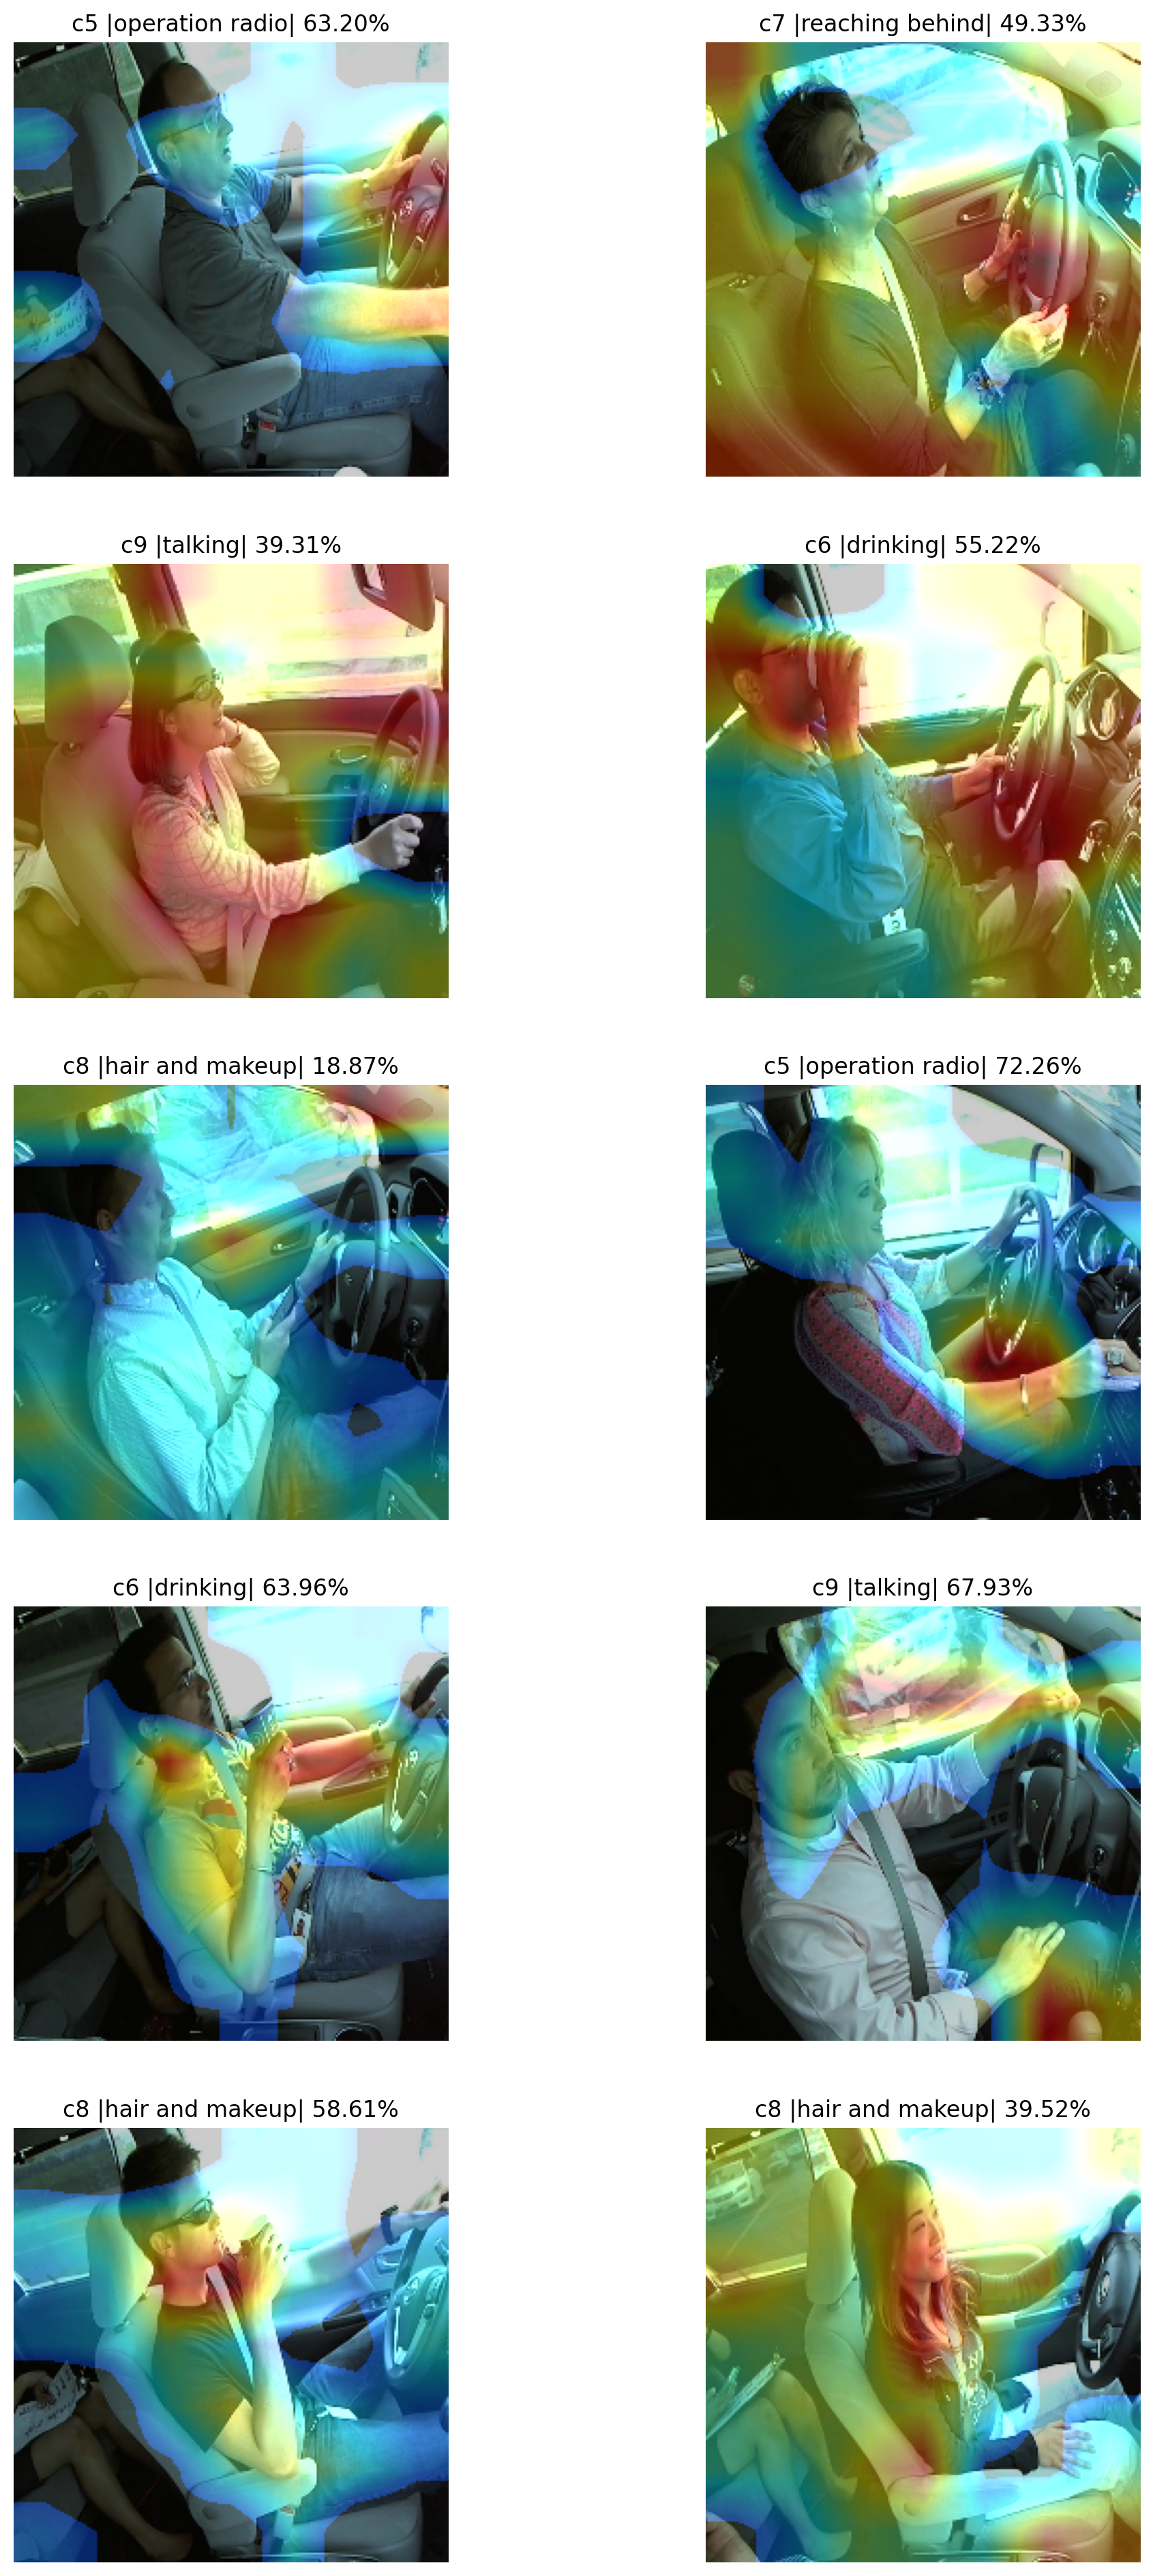

In [17]:
weights = model.layers[final_layer].get_weights()[0]
layer_output = model.layers[visual_layer].output
model2 = Model(model.input, [layer_output, model.output])
print("layer_output {0}".format(layer_output))
print("weights shape {0}".format(weights.shape))
show_heatmap_image(model2, weights)

In [ ]:
def gen_kaggle_csv(model,  model_image_size, csv_name):
    dir = "/ext/Data/distracted_driver_detection/"

    gen = ImageDataGenerator()
    test_generator = gen.flow_from_directory(dir + "test/",  model_image_size, shuffle=False, 
                                             batch_size=batch_size, class_mode=None)
#     s = test_generator.__dict__
#     del s['filenames']
#     print(s)
    y_pred = model.predict_generator(test_generator,  steps=test_generator.samples//batch_size+1,  verbose=1)
    print("y_pred shape {}".format(y_pred.shape))
    y_pred = y_pred.clip(min=0.005, max=0.995)
    print(y_pred[:3])

    l = list()
    for i, fname in enumerate(test_generator.filenames):
        name = fname[fname.rfind('/')+1:]
        l.append( [name, *y_pred[i]] )

    l = np.array(l)
    data = {'img': l[:,0]}
    for i in range(10):
        data["c%d"%i] = l[:,i+1]
    df = pd.DataFrame(data, columns=['img'] + ['c%d'%i for i in range(10)])
    df.head(10)
    df = df.sort_values(by='img')
    df.to_csv(csv_name, index=None, float_format='%.3f')
    print("csv saved")

print("done")

In [ ]:
gen_kaggle_csv(model,  model_image_size, 'csv/vgg16-imagenet-finetune{}-pred.csv'.format(fine_tune_layer))